In [9]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop

In [5]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [7]:
test_data -= mean
test_data /= std

In [32]:
def build_model(lr_val, input_data):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_data,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=RMSprop(learning_rate=lr_val), loss='mse', metrics=['mae'])
    return model

In [33]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 85
all_histories = []

In [34]:
valor = 2
(valor) * num_val_samples

202

In [35]:
for i in range(k):
    print("Fold:", i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_labels[i*num_val_samples : (i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
         axis=0)
    
    partial_train_targets = np.concatenate(
        [train_labels[:i*num_val_samples],
         train_labels[(i+1)*num_val_samples:]],
         axis=0
    )
    model = build_model(0.001, 13)
    history = model.fit(partial_train_data, partial_train_targets, 
                        epochs=num_epochs, 
                        batch_size=16, 
                        validation_data=(val_data, val_targets), verbose=0
                        )
    all_histories.append(history.history['val_mae'])

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold: 0
Fold: 1
Fold: 2
Fold: 3


In [36]:
len(all_histories[0])

85

In [37]:
all_mea_avg = pd.DataFrame(all_histories).mean(axis=0)
all_mea_avg

0     19.189317
1     15.538291
2     11.120542
3      7.350075
4      5.444967
        ...    
80     2.380443
81     2.332675
82     2.407589
83     2.379966
84     2.312190
Length: 85, dtype: float64

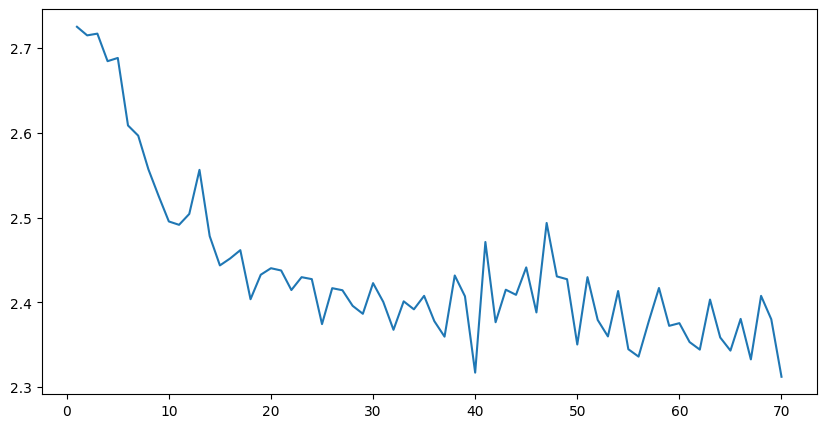

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
plt.plot((range(1, len(all_mea_avg[15:]) + 1)), all_mea_avg[15:])
plt.show()

In [31]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.7016 - mae: 2.6177


[14.83167839050293, 2.738137722015381]